In [35]:
import os
import pickle

import joblib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from metrics.visualization import visualization

%matplotlib inline

## PCA and t-SNE visualization

In [36]:
path = "output/test"

with open(f"{path}/test_data.pickle", "rb") as fb:
    ori_data = pickle.load(fb)
    # ori_data = ori_data.reshape(ori_data.shape[0]*ori_data.shape[1], ori_data.shape[2])
with open(f"{path}/fake_data.pickle", "rb") as fb:
    new_data = pickle.load(fb)
    # new_data = new_data.reshape(new_data.shape[0]*new_data.shape[1], new_data.shape[2])

print(ori_data.shape, new_data.shape)

(50, 2, 1) (50, 2, 1)


In [37]:
print("Original data", ori_data)
print("New data", new_data)

Original data [[[ 5.00000000e-01]
  [-1.00000000e+00]]

 [[ 4.68604740e-01]
  [-1.00000000e+00]]

 [[ 4.37333383e-01]
  [-1.00000000e+00]]

 [[ 4.06309343e-01]
  [-1.00000000e+00]]

 [[ 3.75655056e-01]
  [-1.00000000e+00]]

 [[ 3.45491503e-01]
  [-1.00000000e+00]]

 [[ 3.15937724e-01]
  [-1.00000000e+00]]

 [[ 2.87110354e-01]
  [-1.00000000e+00]]

 [[ 2.59123163e-01]
  [-1.00000000e+00]]

 [[ 2.32086603e-01]
  [-1.00000000e+00]]

 [[ 2.06107374e-01]
  [-1.00000000e+00]]

 [[ 1.81288005e-01]
  [-1.00000000e+00]]

 [[ 1.57726447e-01]
  [-1.00000000e+00]]

 [[ 1.35515686e-01]
  [-1.00000000e+00]]

 [[ 1.14743379e-01]
  [-1.00000000e+00]]

 [[ 9.54915028e-02]
  [-1.00000000e+00]]

 [[ 7.78360372e-02]
  [-1.00000000e+00]]

 [[ 6.18466600e-02]
  [-1.00000000e+00]]

 [[ 4.75864738e-02]
  [-1.00000000e+00]]

 [[ 3.51117571e-02]
  [-1.00000000e+00]]

 [[ 2.44717419e-02]
  [-1.00000000e+00]]

 [[ 1.57084194e-02]
  [-1.00000000e+00]]

 [[ 8.85637464e-03]
  [-1.00000000e+00]]

 [[ 3.94264934e-03]


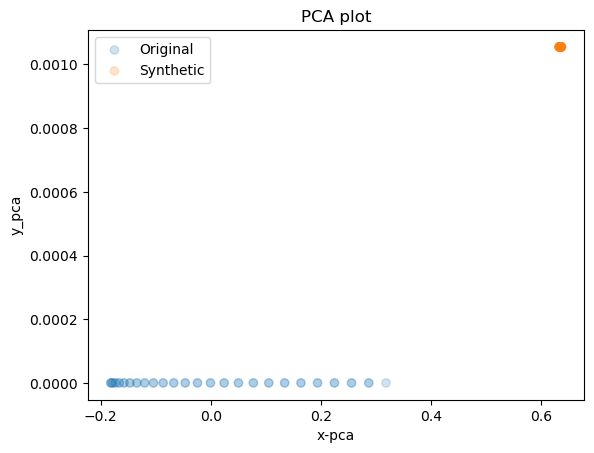

In [38]:
visualization(ori_data, new_data, 'pca')

[t-SNE] Computing 99 nearest neighbors...
[t-SNE] Indexed 100 samples in 0.001s...
[t-SNE] Computed neighbors for 100 samples in 0.286s...
[t-SNE] Computed conditional probabilities for sample 100 / 100
[t-SNE] Mean sigma: 0.002431
[t-SNE] KL divergence after 250 iterations with early exaggeration: 45.523895
[t-SNE] KL divergence after 300 iterations: 0.036905


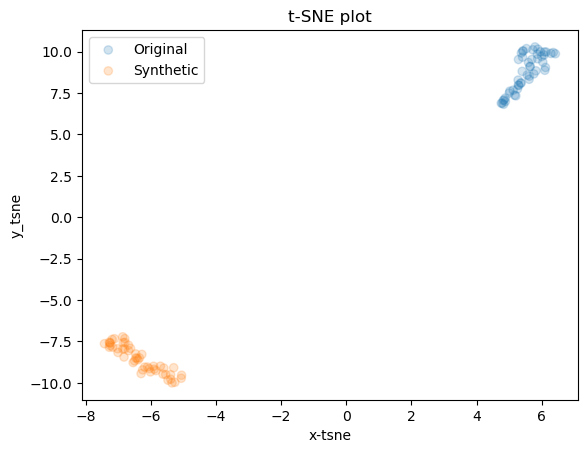

In [39]:
visualization(ori_data, new_data, 'tsne')

(50, 2, 1) (50, 2, 1)


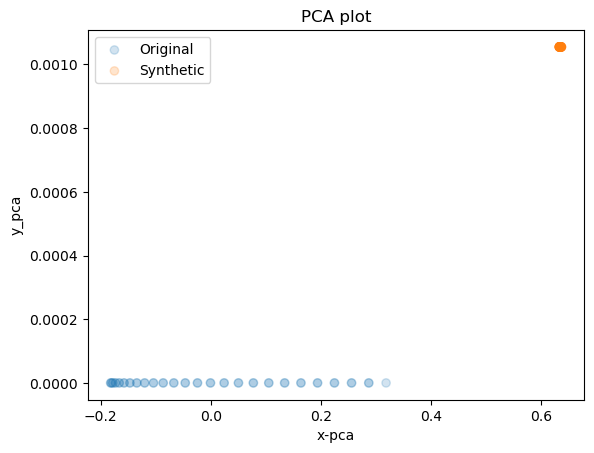

[t-SNE] Computing 99 nearest neighbors...
[t-SNE] Indexed 100 samples in 0.000s...
[t-SNE] Computed neighbors for 100 samples in 0.008s...
[t-SNE] Computed conditional probabilities for sample 100 / 100
[t-SNE] Mean sigma: 0.002431
[t-SNE] KL divergence after 250 iterations with early exaggeration: 46.337440
[t-SNE] KL divergence after 300 iterations: 0.043069


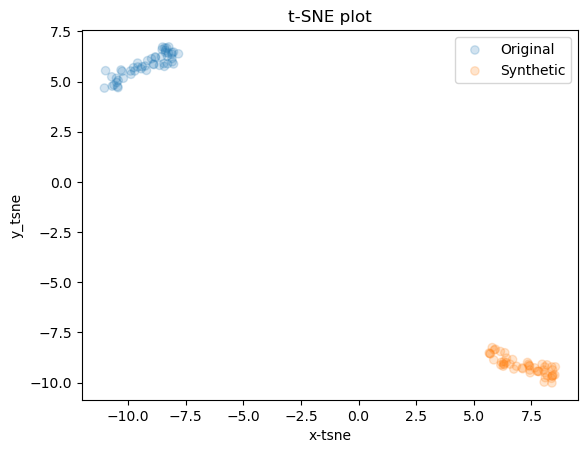

In [40]:
path = "output/test"

with open(f"{path}/test_data.pickle", "rb") as fb:
    ori_data = pickle.load(fb)
    # ori_data = ori_data.reshape(ori_data.shape[0]*ori_data.shape[1], ori_data.shape[2])
with open(f"{path}/fake_data.pickle", "rb") as fb:
    new_data = pickle.load(fb)
    # new_data = new_data.reshape(new_data.shape[0]*new_data.shape[1], new_data.shape[2])

print(ori_data.shape, new_data.shape)

visualization(ori_data, new_data, 'pca')
visualization(ori_data, new_data, 'tsne')

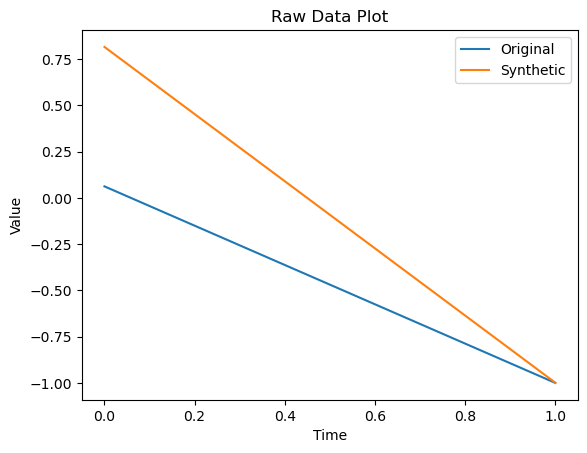

In [41]:
import random

# Select a random instance index
idx = random.randint(0, len(ori_data) - 1)
plt.plot(ori_data[idx,:,0], label='Original')  # Plotting the first feature of the selected instance
plt.plot(new_data[idx,:,0], label='Synthetic')  # Plotting the first feature of the selected instance from generated data

plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Raw Data Plot')
plt.legend()
plt.show()

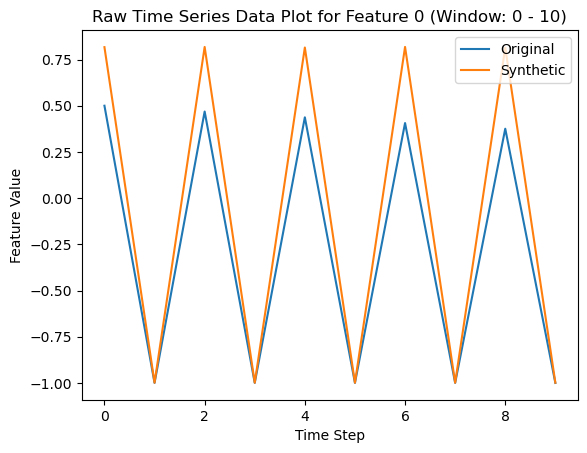

In [42]:
# Select a random feature index (assuming 0-based indexing)
feature_index = 0

# Define the start and end indices of the window
window_start = 0
window_end = 10  # Adjust this value to define the end of the window

# Flatten the arrays to plot the time series data for the selected feature within the window
ori_data_flattened = ori_data[:, window_start:window_end, feature_index].flatten()
new_data_flattened = new_data[:, window_start:window_end, feature_index].flatten()

# Generate corresponding time step indices for the window
time_steps = np.arange(window_start, window_end)

# Plot the time series data within the window with corresponding time steps
plt.plot(time_steps, ori_data_flattened[:window_end - window_start], label='Original')
plt.plot(time_steps, new_data_flattened[:window_end - window_start], label='Synthetic')
plt.xlabel('Time Step')
plt.ylabel('Feature Value')
plt.title('Raw Time Series Data Plot for Feature {} (Window: {} - {})'.format(feature_index, window_start, window_end))
plt.legend()
plt.show()


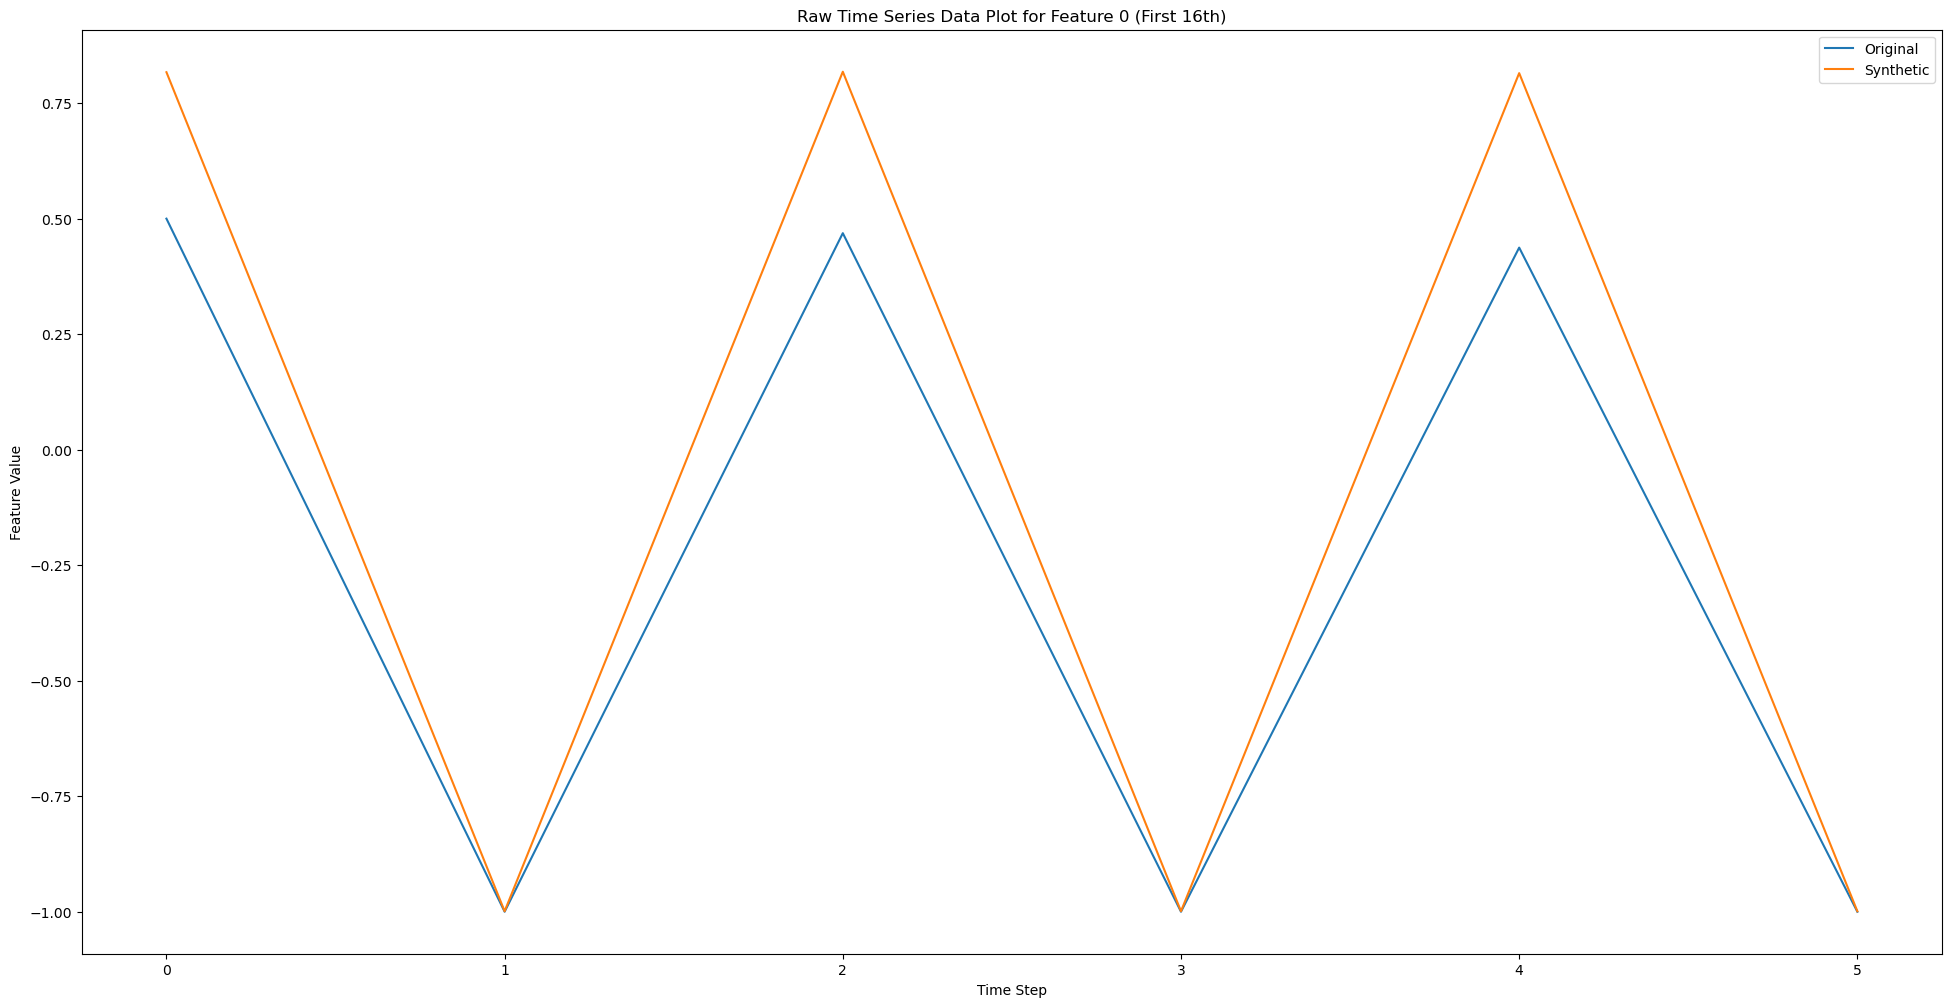

In [43]:
# Select a random feature index (assuming 0-based indexing)
feature_index = 0

# Flatten the arrays to plot the full time series data for the selected feature
ori_data_flattened = ori_data[:,:,feature_index].flatten()
new_data_flattened = new_data[:,:,feature_index].flatten()

# Generate corresponding time step indices
time_steps = np.arange(len(ori_data_flattened))

# Set the figure size
plt.figure(figsize=(24, 12))  # Adjust width and height as needed

# Determine the length of the time series data
total_time_steps = len(ori_data_flattened)

# Calculate the range for the quarter of the data
quarter_range = total_time_steps // 16

# Plot only the first quarter of the data
plt.plot(time_steps[:quarter_range], ori_data_flattened[:quarter_range], label='Original')
plt.plot(time_steps[:quarter_range], new_data_flattened[:quarter_range], label='Synthetic')
plt.xlabel('Time Step')
plt.ylabel('Feature Value')
plt.title('Raw Time Series Data Plot for Feature {} (First 16th)'.format(feature_index))
plt.legend()
plt.show()

1600


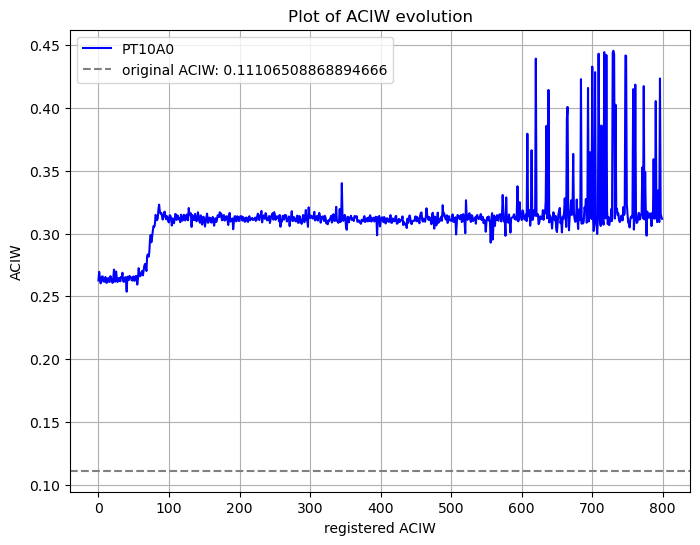

In [44]:
import pickle
import matplotlib.pyplot as plt

path = "output/test"

# Load the list of values from the first pickle file
#with open(f"{path}/sinfunc/SIN_ACIW_PT50_A1000_ARIMA.pickle", 'rb') as f:
#    values_list = pickle.load(f)

with open(f"{path}/sinfunc/SIN_ACIW_PT10_A1_ARIMA1.pickle", 'rb') as f:
    values_list4 = pickle.load(f)

with open(f"{path}/sinfunc/SIN_ACIW_PT10_A1_ARIMA2.pickle", 'rb') as f:
    values_list3 = pickle.load(f)

with open(f"{path}/sinfunc/SIN_ACIW_PT10_A1_ARIMA.pickle", 'rb') as f:
    values_list5 = pickle.load(f)

# Check if the loaded data is a list or a single value
if not isinstance(values_list4, list):
    values_list4 = [values_list4]  # Convert to list if it's a single value

print(len(values_list5))

# Load the single value from the second pickle file
with open(f"{path}/sinfunc/ARIMA_ACIW_O.pickle", 'rb') as f:
    single_value = pickle.load(f)

# Plot the values
plt.figure(figsize=(8, 6))  # Set the figure size (optional)

#plt.plot(values_list4, linestyle='-', color='m', label='MSL2F4')  # Plot the values
plt.plot(values_list3, linestyle='-', color='b', label='PT10A0')  # Plot the values
#plt.plot(values_list5, linestyle='-', color='g', label='MSL100F1')  # Plot the values
plt.axhline(y=single_value, color='gray', linestyle='--', label=f'original ACIW: {single_value}')  # Add horizontal line

plt.title('Plot of ACIW evolution')  # Set plot title
plt.xlabel('registered ACIW')  # Set x-axis label (optional)
plt.ylabel('ACIW')  # Set y-axis label (optional)
plt.grid(True)  # Show grid (optional)
plt.legend()  # Show legend

plt.show()  # Display the plot

410


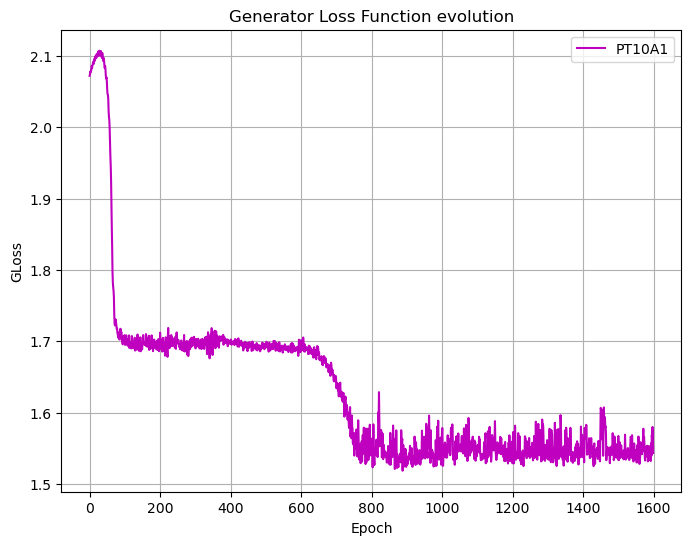

In [46]:
import pickle
import matplotlib.pyplot as plt

path = "output/test"

# Load the list of values from the first pickle file
#with open(f"{path}/sinfunc/SIN_ACIW_PT50_A1000_ARIMA.pickle", 'rb') as f:
#    values_list = pickle.load(f)

with open(f"{path}/sinfunc/GLoss_normal_only.pickle", 'rb') as f:
    values_list1 = pickle.load(f)

with open(f"{path}/sinfunc/GLoss_mod_PT10_A1_ARIMA.pickle", 'rb') as f:
    values_list2 = pickle.load(f)

with open(f"{path}/sinfunc/GLoss_mod_PT10_A50_ARIMA.pickle", 'rb') as f:
    values_list3 = pickle.load(f)

with open(f"{path}/sinfunc/GLoss_mod_PT10_A0_ARIMA.pickle", 'rb') as f:
    values_list4 = pickle.load(f)

# Check if the loaded data is a list or a single value
if not isinstance(values_list1, list):
    values_list1 = [values_list1]  # Convert to list if it's a single value

print(len(values_list1))

# Load the single value from the second pickle file

# Plot the values
plt.figure(figsize=(8, 6))  # Set the figure size (optional)

#plt.plot(values_list1, linestyle='-', color='b', label='GLoss_normal')  # Plot the values
plt.plot(values_list2, linestyle='-', color='m', label='PT10A1')  # Plot the values
#plt.plot(values_list3, linestyle='-', color='g', label='PT10A50')  # Plot the values
#plt.plot(values_list4, linestyle='-', color='b', label='PT10A0')  # Plot the values

plt.title('Generator Loss Function evolution')  # Set plot title
plt.xlabel('Epoch')  # Set x-axis label (optional)
plt.ylabel('GLoss')  # Set y-axis label (optional)
plt.grid(True)  # Show grid (optional)
plt.legend()  # Show legend

plt.show()  # Display the plot

800


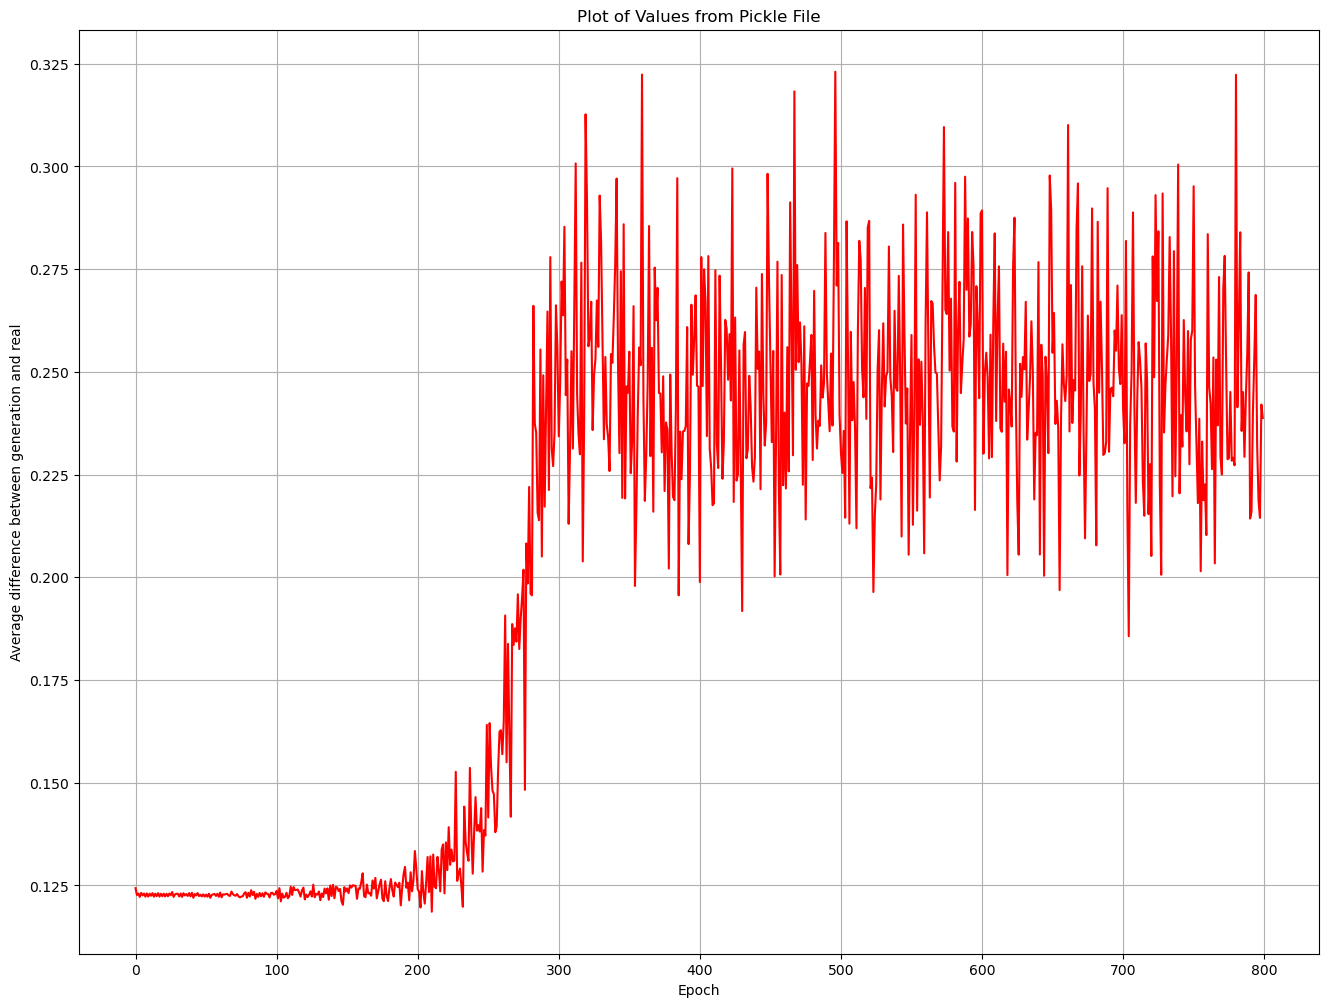

In [1]:
import pickle
import matplotlib.pyplot as plt
path = "output/test"


# Load the list of values from the pickle file
with open(f"{path}/sinfunc/SIN_AD_PT10_A1_F4_ARIMA.pickle", 'rb') as f:
    values_list = pickle.load(f)

print(len(values_list))

# Check if the loaded data is a list or a single value
if not isinstance(values_list, list):
    values_list = [values_list]  # Convert to list if it's a single value

# Plot the values
plt.figure(figsize=(16, 12))  # Set the figure size (optional)

plt.plot(values_list, linestyle='-', color='r')  # Plot the values
plt.title('Plot of Values from Pickle File')  # Set plot title
plt.xlabel('Epoch')  # Set x-axis label (optional)
plt.ylabel('Average difference between generation and real')  # Set y-axis label (optional)
plt.grid(True)  # Show grid (optional)

plt.show()  # Display the plot

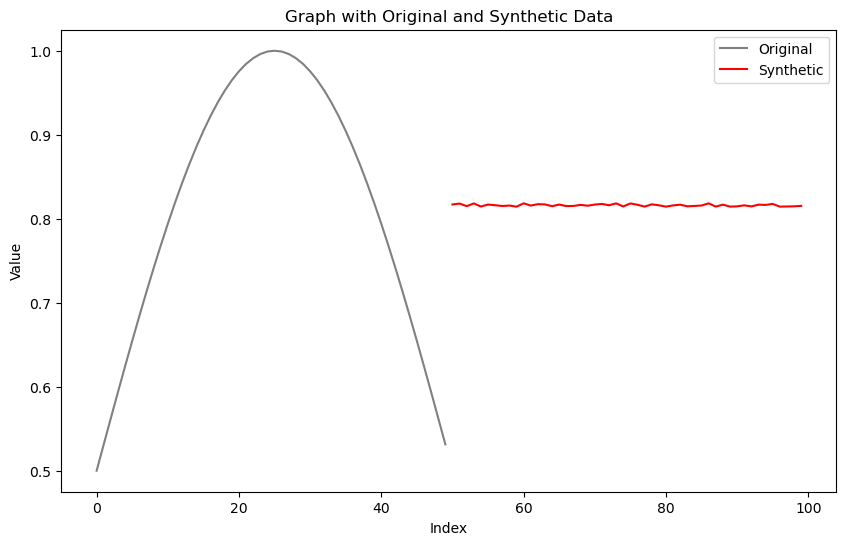

In [31]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt

def prepare_data1(train, test):
    # Extract the first elements for the train data array
    first_elements_train = train[:, 0, 0]
    # Create an array of indices for the train data array
    indices_train = np.arange(len(first_elements_train))
    
    # Create a pandas DataFrame for the train data array
    df_train = pd.DataFrame({
        'idx': indices_train,
        'val': first_elements_train
    })
    
    # Extract the first elements for the test data array
    first_elements_test = test[:, 0, 0]
    # Create an array of indices for the test data array, starting after the last index of the train array
    indices_test = np.arange(len(first_elements_test)) + len(first_elements_train)
    
    # Create a pandas DataFrame for the test data array
    df_test = pd.DataFrame({
        'idx': indices_test,
        'val': first_elements_test
    })

    return df_train, df_test

# Load original and synthetic data
path = "output/test"

with open(f"{path}/train_data.pickle", "rb") as fb:
    ori_data = pickle.load(fb)

with open(f"{path}/fake_data.pickle", "rb") as fb:
    fake_data = pickle.load(fb)

# Prepare DataFrames for plotting
df_original, df_synthetic = prepare_data1(ori_data, fake_data)

# Plotting both graphs
plt.figure(figsize=(10, 6))

# Plot original data in gray
plt.plot(df_original['idx'], df_original['val'], color='gray', label='Original')

# Plot synthetic data in red
plt.plot(df_synthetic['idx'], df_synthetic['val'], color='red', label='Synthetic')

# Set plot labels and title
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Graph with Original and Synthetic Data')

# Add legend
plt.legend()

# Show plot
plt.show()



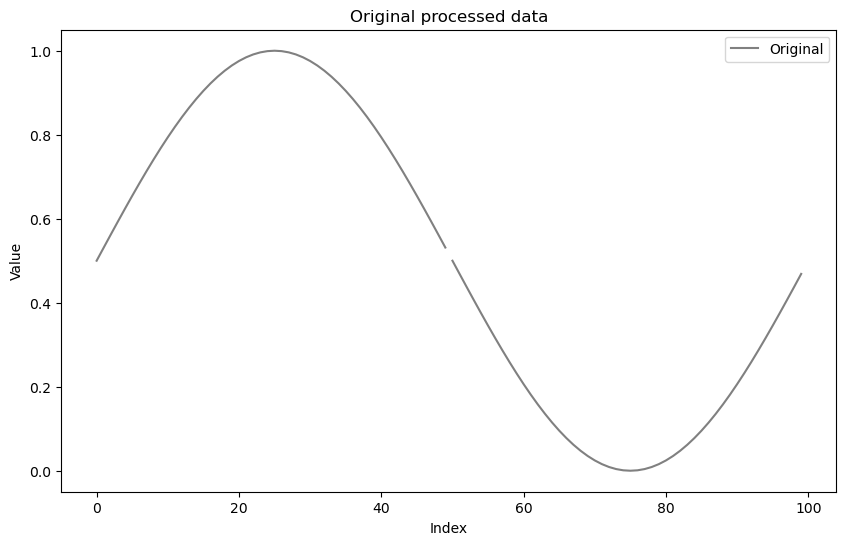

In [32]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt

def prepare_data1(train, test):
    # Extract the first elements for the train data array
    first_elements_train = train[:, 0, 0]
    # Create an array of indices for the train data array
    indices_train = np.arange(len(first_elements_train))
    
    # Create a pandas DataFrame for the train data array
    df_train = pd.DataFrame({
        'idx': indices_train,
        'val': first_elements_train
    })
    
    # Extract the first elements for the test data array
    first_elements_test = test[:, 0, 0]
    # Create an array of indices for the test data array, starting after the last index of the train array
    indices_test = np.arange(len(first_elements_test)) + len(first_elements_train)
    
    # Create a pandas DataFrame for the test data array
    df_test = pd.DataFrame({
        'idx': indices_test,
        'val': first_elements_test
    })

    return df_train, df_test

# Load original and synthetic data
path = "output/test"

with open(f"{path}/train_data.pickle", "rb") as fb:
    ori_data = pickle.load(fb)

with open(f"{path}/test_data.pickle", "rb") as fb:
    fake_data = pickle.load(fb)

# Prepare DataFrames for plotting
df_original, df_synthetic = prepare_data1(ori_data, fake_data)

# Plotting both graphs
plt.figure(figsize=(10, 6))

# Plot original data in gray
plt.plot(df_original['idx'], df_original['val'], color='gray', label='Original')

# Plot synthetic data in red
plt.plot(df_synthetic['idx'], df_synthetic['val'], color='gray')

# Set plot labels and title
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Original processed data')

# Add legend
plt.legend()

# Show plot
plt.show()

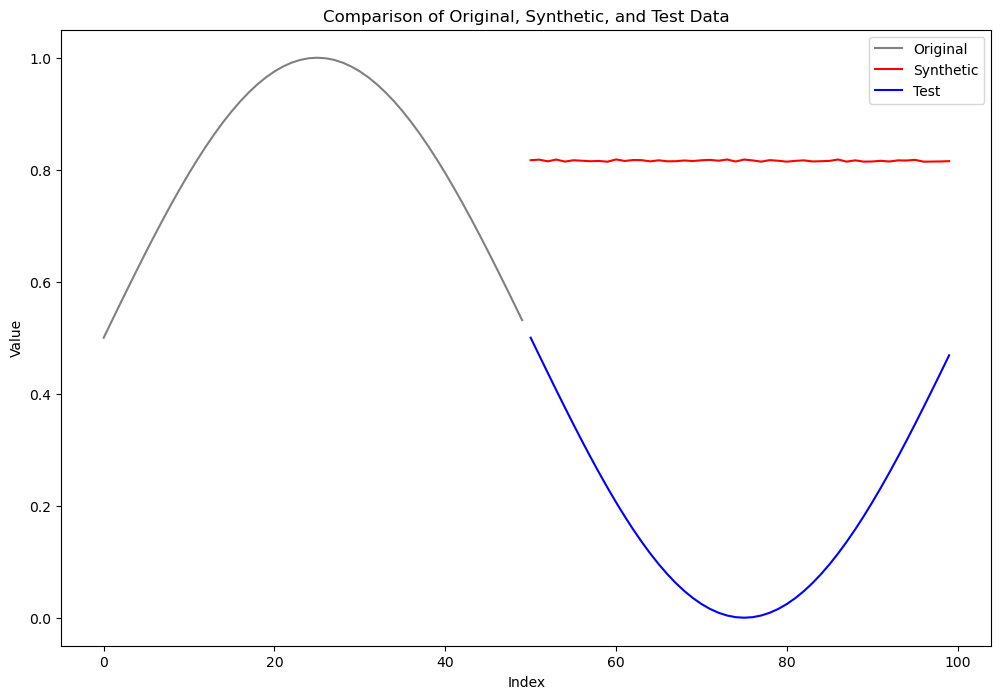

Mean Absolute Error between Original and Synthetic Data:  0.6342156680750322


In [33]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error

def prepare_data1(train, test):
    # Extract the first elements for the train data array
    first_elements_train = train[:, 0, 0]
    # Create an array of indices for the train data array
    indices_train = np.arange(len(first_elements_train))
    
    # Create a pandas DataFrame for the train data array
    df_train = pd.DataFrame({
        'idx': indices_train,
        'val': first_elements_train
    })
    
    # Extract the first elements for the test data array
    first_elements_test = test[:, 0, 0]
    # Create an array of indices for the test data array, starting after the last index of the train array
    indices_test = np.arange(len(first_elements_test)) + len(first_elements_train)
    
    # Create a pandas DataFrame for the test data array
    df_test = pd.DataFrame({
        'idx': indices_test,
        'val': first_elements_test
    })

    return df_train, df_test

# Load original, fake, and test data
path = "output/test"

with open(f"{path}/train_data.pickle", "rb") as fb:
    ori_data = pickle.load(fb)

with open(f"{path}/fake_data.pickle", "rb") as fb:
    fake_data = pickle.load(fb)

with open(f"{path}/test_data.pickle", "rb") as fb:
    test_data = pickle.load(fb)

# Prepare DataFrames for plotting
df_original, df_fake = prepare_data1(ori_data, fake_data)
_, df_test = prepare_data1(ori_data, test_data)

# Plotting both graphs on the same figure
plt.figure(figsize=(12, 8))

# Plot original data in gray
plt.plot(df_original['idx'], df_original['val'], color='gray', label='Original')

# Plot synthetic data in red
plt.plot(df_fake['idx'], df_fake['val'], color='red', label='Synthetic')

# Plot test data in blue
plt.plot(df_test['idx'], df_test['val'], color='blue', label='Test')

# Set plot labels and title
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Comparison of Original, Synthetic, and Test Data')

# Add legend
plt.legend()

# Show plot
plt.show()


print("Mean Absolute Error between Original and Synthetic Data: ", mean_absolute_error(df_test['val'], df_fake['val']))


In [80]:
import os
import pandas as pd

# Function to create directory if it does not exist
def ensure_dir(file_path):
    directory = os.path.dirname(file_path)
    if not os.path.exists(directory):
        os.makedirs(directory)

# Function to process each pair of train and test CSV files
def process_csv_pair(train_file, output_prefix):
    # Load the train and test datasets
    train_df = pd.read_csv(train_file)
    
    # Add the 'idx' column
    train_df.insert(0, 'Idx', range(1, len(train_df) + 1))
    
    # Specify the columns to process
    columns_to_process = ['V2', 'V3', 'V4', 'V5', 'V6', 'V7']
    
    # Process each specified column
    for col in columns_to_process:
        # Select idx and current column from train and test datasets
        train_subset = train_df[['Idx', col]].copy()
        
        # Save the resulting dataframe to a CSV file
        output_file = f"{output_prefix}_{col}.csv"
        ensure_dir(output_file)  # Ensure the directory exists
        train_subset.to_csv(output_file, index=False)

# Example usage
pairs = [
    ("data/Daily-train.csv", "data/m4_assets/daily/D")
]

for train_file, output_prefix in pairs:
    process_csv_pair(train_file, output_prefix)


In [87]:
import pandas as pd

# Step 1: Read the dataset
file_path = 'data/m4_assets/daily/D_V7.csv'  # Update this path to your actual file location
df = pd.read_csv(file_path)

# Step 3: Function to categorize each half
def categorize_half(df):
    categories = {
        'macro': df.iloc[0:127].copy(),
        'micro': df.iloc[127:1603].copy(),
        'demographic': df.iloc[1603:1613].copy(),
        'Industry': df.iloc[1613:2035].copy(),
        'Finance': df.iloc[2035:3594].copy(),
        'Other': df.iloc[3594:4227].copy()
    }
    return categories

first_half_categories = categorize_half(df)


# Step 5: Reformat the Idx column
for category in first_half_categories.keys():
    first_half_categories[category]['Idx'] = range(1, len(first_half_categories[category]) + 1)

# Step 6: Save each category to a CSV file
output_directory = 'data/m4_assets/daily/V7/'  # Update this path to your desired output directory
for category, data in first_half_categories.items():
    output_file = f'{output_directory}{category}_combined.csv'
    data.to_csv(output_file, index=False)

# Print out a summary
for category, data in first_half_categories.items():
    print(f'{category} category has {len(data)} rows and columns: {list(data.columns)}')

macro category has 127 rows and columns: ['Idx', 'V7']
micro category has 1476 rows and columns: ['Idx', 'V7']
demographic category has 10 rows and columns: ['Idx', 'V7']
Industry category has 422 rows and columns: ['Idx', 'V7']
Finance category has 1559 rows and columns: ['Idx', 'V7']
Other category has 633 rows and columns: ['Idx', 'V7']


# Testing visualization

## 1st) raw data

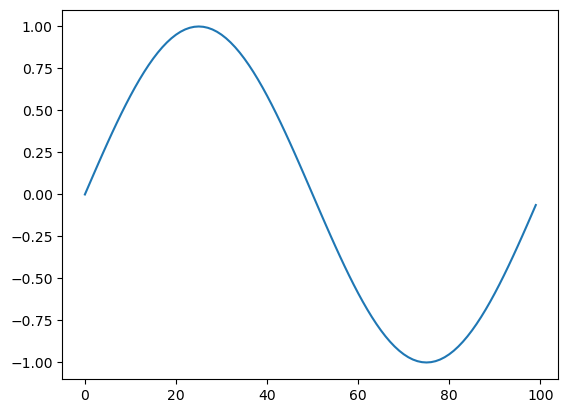

In [21]:
import pandas as pd  
import matplotlib.pyplot as plt
import numpy as np
from data.data_preprocess import imputer
from tqdm import tqdm
from scipy import stats
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Load the dataset
file_path = 'data/sin_func.csv'  # Update this path to your actual file location

# Load the dataset
ori_data = pd.read_csv(file_path)

plt.plot(ori_data['sin_value'])
plt.show()

condition not fulfilled


<AxesSubplot:xlabel='Idx'>

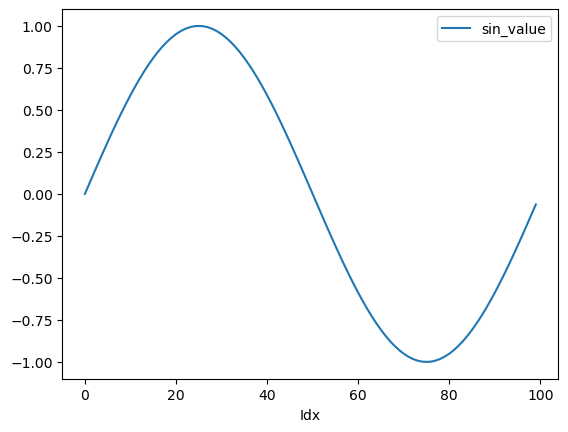

In [22]:
# Remove spurious column, so that column 0 is now 'admissionid'.
if ori_data.columns[0] == "Unnamed: 0":
    print("Removing spurious column")  
    ori_data = ori_data.drop(["Unnamed: 0"], axis=1)

print("condition not fulfilled")
ori_data.plot(x='Idx', y='sin_value', kind='line')

Dropped 0 rows (outliers)



<AxesSubplot:xlabel='Idx'>

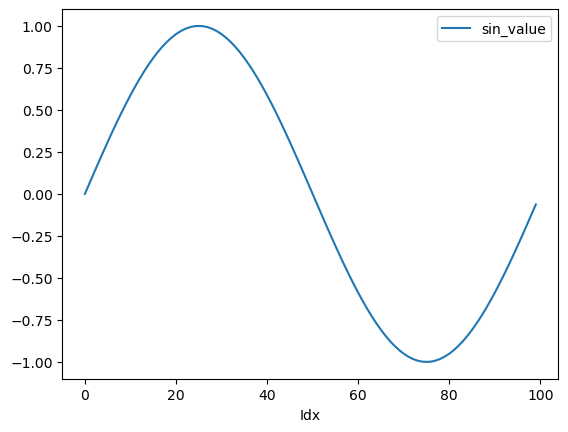

In [23]:
no = ori_data.shape[0]
z_scores = stats.zscore(ori_data, axis=0, nan_policy='omit')
z_filter = np.nanmax(np.abs(z_scores), axis=1) < 3
ori_data = ori_data[z_filter]
print(f"Dropped {no - ori_data.shape[0]} rows (outliers)\n")

ori_data.plot(x='Idx', y='sin_value', kind='line')

Number of unique IDs: 100
Number of features: 1


<AxesSubplot:xlabel='Idx'>

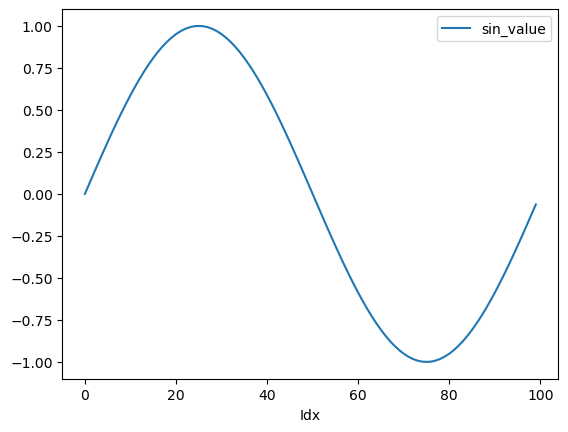

In [24]:
index = 'Idx'

# Parameters
uniq_id = np.unique(ori_data[index])
no = len(uniq_id)
dim = len(ori_data.columns) - 1

print(f"Number of unique IDs: {no}")
print(f"Number of features: {dim}")

ori_data.plot(x='Idx', y='sin_value', kind='line')

<AxesSubplot:xlabel='Idx'>

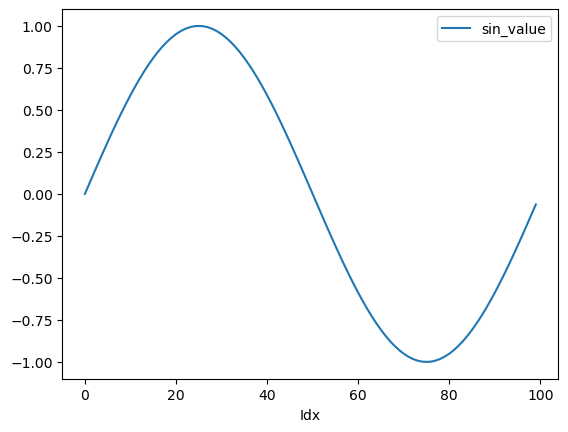

In [25]:
scaler = MinMaxScaler()
scaler.fit(ori_data)
params = [scaler.data_min_, scaler.data_max_]
impute_vals = stats.mode(ori_data).mode[0]

ori_data.plot(x='Idx', y='sin_value', kind='line')

In [26]:
# Output initialization
output = np.empty([no, 2, dim])  # Shape:[no, max_seq_len, dim]
output.fill(-1)
time = []

100%|██████████| 100/100 [00:00<00:00, 549.47it/s]


Output shape: (100, 2, 1)
Output data: [[[ 5.00000000e-01]
  [-1.00000000e+00]]

 [[ 5.31395260e-01]
  [-1.00000000e+00]]

 [[ 5.62666617e-01]
  [-1.00000000e+00]]

 [[ 5.93690657e-01]
  [-1.00000000e+00]]

 [[ 6.24344944e-01]
  [-1.00000000e+00]]

 [[ 6.54508497e-01]
  [-1.00000000e+00]]

 [[ 6.84062276e-01]
  [-1.00000000e+00]]

 [[ 7.12889646e-01]
  [-1.00000000e+00]]

 [[ 7.40876837e-01]
  [-1.00000000e+00]]

 [[ 7.67913397e-01]
  [-1.00000000e+00]]

 [[ 7.93892626e-01]
  [-1.00000000e+00]]

 [[ 8.18711995e-01]
  [-1.00000000e+00]]

 [[ 8.42273553e-01]
  [-1.00000000e+00]]

 [[ 8.64484314e-01]
  [-1.00000000e+00]]

 [[ 8.85256621e-01]
  [-1.00000000e+00]]

 [[ 9.04508497e-01]
  [-1.00000000e+00]]

 [[ 9.22163963e-01]
  [-1.00000000e+00]]

 [[ 9.38153340e-01]
  [-1.00000000e+00]]

 [[ 9.52413526e-01]
  [-1.00000000e+00]]

 [[ 9.64888243e-01]
  [-1.00000000e+00]]

 [[ 9.75528258e-01]
  [-1.00000000e+00]]

 [[ 9.84291581e-01]
  [-1.00000000e+00]]

 [[ 9.91143625e-01]
  [-1.00000000e+0

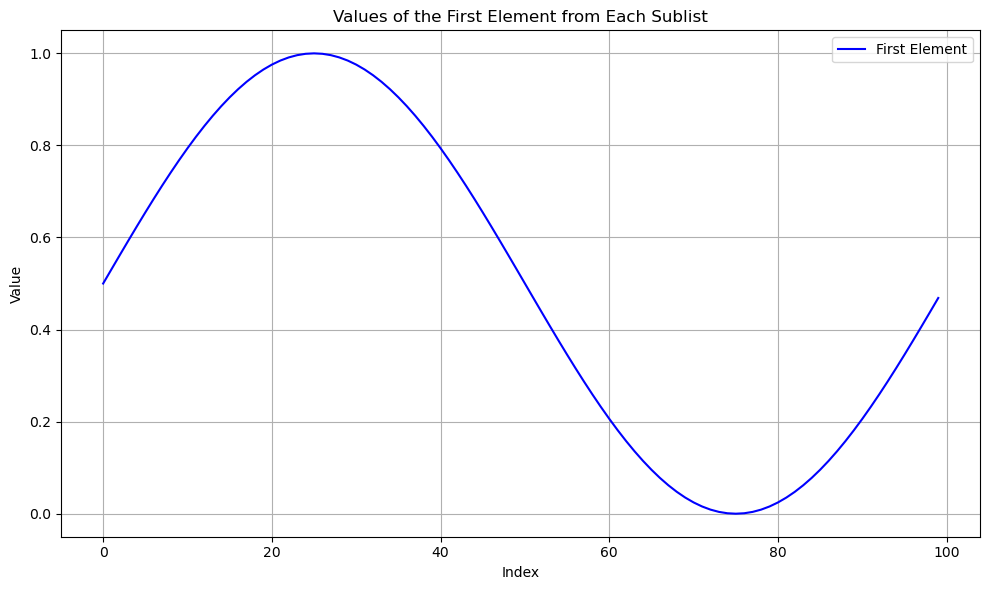

In [27]:
for i in tqdm(range(no)):
    # Extract the time-series data with a certain admissionid
    curr_data = ori_data[ori_data[index] == uniq_id[i]].to_numpy()
    # Impute missing data
    curr_data = imputer(curr_data, impute_vals)
    # Normalize data
    curr_data = scaler.transform(curr_data)
    
    # Extract time and assign to the preprocessed data (Excluding ID)
    curr_no = len(curr_data)
    # Pad data to `max_seq_len`
    if curr_no >= 2:
        output[i, :, :] = curr_data[:2, 1:]  # Shape: [1, max_seq_len, dim]
        time.append(2)
    else:
        output[i, :curr_no, :] = curr_data[:, 1:]  # Shape: [1, max_seq_len, dim]
        time.append(curr_no)

print(f"Output shape: {output.shape}")
print(f"Output data: {output}")

first_elements = output[:, 0, 0]

# Create an array of indices for plotting against
indices = np.arange(len(first_elements))

# Plotting the values
plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
plt.plot(indices, first_elements, linestyle='-', color='b', label='First Element')
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Values of the First Element from Each Sublist')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()